In [25]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

In [26]:
dataset_path = "berlin52.tsp"

coordinates = []
reading_nodes = False

with open(dataset_path, "r") as file:
    for line in file:
        line = line.strip()
        if line == "NODE_COORD_SECTION":
            reading_nodes = True
            continue
        if line == "EOF":
            break
        if reading_nodes:
            parts = line.split()
            if len(parts) == 3:
                _, x, y = parts
                coordinates.append((float(x), float(y)))
coordinates = np.array(coordinates)
print(coordinates)


[[ 565.  575.]
 [  25.  185.]
 [ 345.  750.]
 [ 945.  685.]
 [ 845.  655.]
 [ 880.  660.]
 [  25.  230.]
 [ 525. 1000.]
 [ 580. 1175.]
 [ 650. 1130.]
 [1605.  620.]
 [1220.  580.]
 [1465.  200.]
 [1530.    5.]
 [ 845.  680.]
 [ 725.  370.]
 [ 145.  665.]
 [ 415.  635.]
 [ 510.  875.]
 [ 560.  365.]
 [ 300.  465.]
 [ 520.  585.]
 [ 480.  415.]
 [ 835.  625.]
 [ 975.  580.]
 [1215.  245.]
 [1320.  315.]
 [1250.  400.]
 [ 660.  180.]
 [ 410.  250.]
 [ 420.  555.]
 [ 575.  665.]
 [1150. 1160.]
 [ 700.  580.]
 [ 685.  595.]
 [ 685.  610.]
 [ 770.  610.]
 [ 795.  645.]
 [ 720.  635.]
 [ 760.  650.]
 [ 475.  960.]
 [  95.  260.]
 [ 875.  920.]
 [ 700.  500.]
 [ 555.  815.]
 [ 830.  485.]
 [1170.   65.]
 [ 830.  610.]
 [ 605.  625.]
 [ 595.  360.]
 [1340.  725.]
 [1740.  245.]]


In [27]:
def euclidean_distance(p1, p2):
  return np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)


In [28]:
def generate_random_route(num_cities):
  cities = list(range(2, num_cities + 1))
  random.shuffle(cities)
  route = [1] + cities + [1]
  return route

In [29]:
def calculate_route_distance(route, coordinates):
  total_distance = 0.0
  #print(len(route))
  for i in range(len(route) - 1):
    city1 = route[i] - 1
    city2 = route[i + 1] - 1
    total_distance += euclidean_distance(coordinates[city1], coordinates[city2])
  return total_distance

In [30]:
def initialization(pop_size, num_cities):
  population = [generate_random_route(num_cities) for _ in range(pop_size)]
  return population


In [31]:
def roulette_wheel_selection(population, coordinates, num_selected):
  fitness_values = np.array([1 / calculate_route_distance(route, coordinates) for route in population])
  probabilities = fitness_values / np.sum(fitness_values)
  selected_indices = np.random.choice(len(population), size=num_selected, replace=True, p=probabilities)
  selected_parents = [population[i] for i in selected_indices]
  return selected_parents


In [32]:
def crossover(parent1, parent2):

  size = len(parent1)
  point1, point2 = sorted(random.sample(range(1, size - 1), 2))
  child = [-1] * size
  child[point1:point2] = parent1[point1:point2]
  remaining_cities = [city for city in parent2 if city not in child]
  child[:point1] = remaining_cities[:point1]
  child[point2:] = remaining_cities[point1:]
  child[0] = 1
  child[-1] = 1

  return child

In [33]:
def mutation(route, mutation_rate=0.1):
    mutated_route = route.copy()
    if random.random() < mutation_rate:
        i, j = sorted(random.sample(range(1, len(route) - 1), 2))
        mutated_route[i:j + 1] = reversed(mutated_route[i:j + 1])

    return mutated_route


In [34]:
def create_next_generation_fixed(population, coordinates, elite_size=1, mutation_rate=0.1):
    sorted_population = sorted(population, key=lambda route: calculate_route_distance(route, coordinates))
    next_generation = sorted_population[:elite_size]
    num_offspring_needed = len(population) - elite_size
    selected_parents = roulette_wheel_selection(population, coordinates, num_offspring_needed)
    offspring = []
    while len(offspring) < num_offspring_needed:
        parent1, parent2 = random.sample(selected_parents, 2)  # Select two parents randomly
        # [1, 1, 4, 9, 8, 2, 3, 1, 5, 6, 1, 7]
        child = crossover(parent1, parent2)
        offspring.append(child)
    mutated_offspring = [mutation(child, mutation_rate) for child in offspring]
    next_generation.extend(mutated_offspring)

    return next_generation

In [35]:
def two_opt(route, coordinates):
    improved = True
    best_route = route.copy()
    best_distance = calculate_route_distance(best_route, coordinates)

    while improved:
        improved = False
        for i in range(1, len(route) - 2):
            for j in range(i + 1, len(route) - 1):
                new_route = best_route[:i] + best_route[i:j+1][::-1] + best_route[j+1:]
                new_distance = calculate_route_distance(new_route, coordinates)
                if new_distance < best_distance:
                    best_route = new_route
                    best_distance = new_distance
                    improved = True

    return best_route


Generation 0: Best Distance = 8294.36
Generation 30: Best Distance = 8160.88
Generation 60: Best Distance = 8093.73
Generation 90: Best Distance = 8093.73
Generation 120: Best Distance = 8093.73
Generation 150: Best Distance = 7807.44
Generation 180: Best Distance = 7807.44
Generation 210: Best Distance = 7807.44
Generation 240: Best Distance = 7807.44
Generation 270: Best Distance = 7807.44
Generation 300: Best Distance = 7807.44
Generation 330: Best Distance = 7807.44
Generation 360: Best Distance = 7807.44
Generation 390: Best Distance = 7807.44
The final best dictance is 7807.437328666727
The final best route is [1, 49, 36, 35, 34, 39, 40, 37, 38, 48, 24, 5, 15, 6, 4, 25, 12, 28, 27, 26, 47, 13, 14, 52, 11, 51, 33, 43, 10, 9, 8, 41, 19, 45, 32, 22, 31, 18, 3, 17, 21, 42, 7, 2, 30, 29, 16, 46, 44, 50, 20, 23, 1]


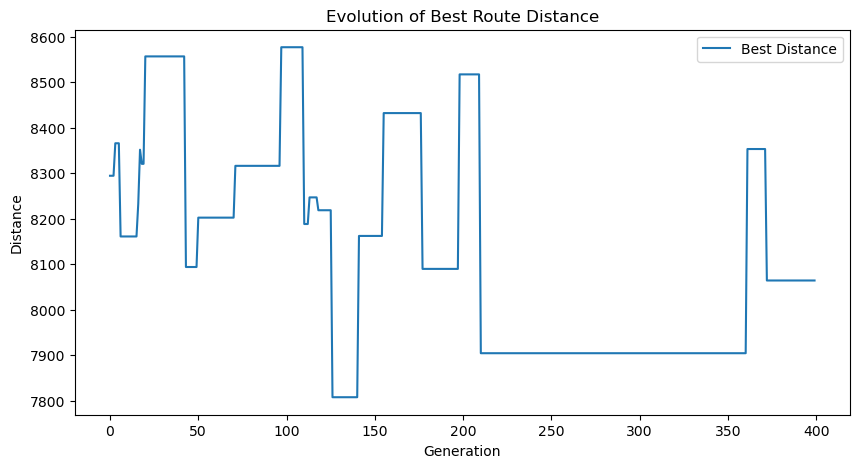

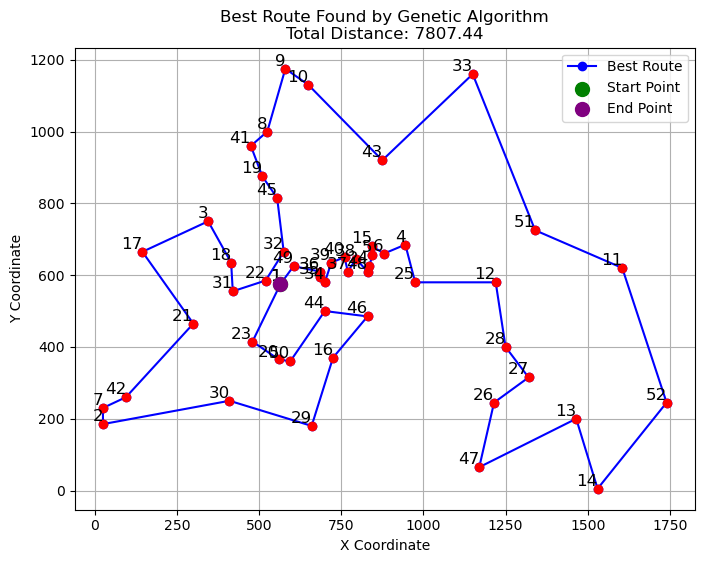

In [37]:
def run_genetic_algorithm(num_generations, pop_size, mutation_rate=0.1, elite_size=2):
    num_cities = len(coordinates)
    population = initialization(pop_size, num_cities)
    fitness = [calculate_route_distance(route, coordinates) for route in population]
    #print(population)
    #print(np.min(fitness))

    best_distances = []
    best_overall_route = None
    best_overall_distance = float('inf')

    for generation in range(num_generations):
        current_mutation_rate = max(0.03, mutation_rate * (1 - (generation / num_generations)))
        population = create_next_generation_fixed(population, coordinates, elite_size, current_mutation_rate)

        best_route = min(population, key=lambda route: calculate_route_distance(route, coordinates))
        best_route = two_opt(best_route, coordinates)
        best_distance = calculate_route_distance(best_route, coordinates)

        if best_distance < best_overall_distance:
            best_overall_distance = best_distance
            best_overall_route = best_route
        best_distances.append(best_distance)


        if generation % 30 == 0:
            print(f"Generation {generation}: Best Distance = {best_overall_distance:.2f}")
        

    best_route = two_opt(best_overall_route, coordinates)
    best_distance = calculate_route_distance(best_route, coordinates)
    print(f"The final best dictance is {best_distance}")
    print(f"The final best route is {best_route}")
    plt.figure(figsize=(10, 5))
    plt.plot(best_distances, label="Best Distance")
    plt.xlabel("Generation")
    plt.ylabel("Distance")
    plt.title("Evolution of Best Route Distance")
    plt.legend()
    plt.show()

        # Extract coordinates of the best route
    route_x = [coordinates[i - 1][0] for i in best_route] + [coordinates[best_route[0]-1][0]]
    route_y = [coordinates[i - 1][1] for i in best_route] + [coordinates[best_route[0]-1][1]]

    # Plot the best route
    plt.figure(figsize=(8, 6))
    plt.plot(route_x, route_y, marker='o', linestyle='-', color='b', label="Best Route")
    plt.scatter(route_x, route_y, color='red', zorder=3)

    # Mark the start and end points
    plt.scatter(route_x[0], route_y[0], color='green', s=100, label="Start Point", zorder=4)
    plt.scatter(route_x[-1], route_y[-1], color='purple', s=100, label="End Point", zorder=4)

    # Add text annotations for each point
    for i, (x, y) in enumerate(zip(route_x[:-1], route_y[:-1])):
        plt.text(x, y, str(best_route[i]), fontsize=12, ha='right', va='bottom')

    # Set titles and labels
    plt.title(f"Best Route Found by Genetic Algorithm\nTotal Distance: {best_distance:.2f}")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.legend()
    plt.grid(True)

    # Show the figure
    plt.show()

    return best_route, best_distance, best_distances

best_route, best_distance, best_distances = run_genetic_algorithm(num_generations=400, pop_size=1000)
